In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#................................................................
# libraries for analysing and cleaning ♻️

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#.................................................................
# libraries for creating and testing model ⚙️

In [3]:
import pickle
#.................................................................
# saving model

Data Collection and Preparation

In [4]:
data=pd.read_csv('messages.csv')
#................................................................
# reading data from csv file

In [5]:
data.sample(7)
#................................................................
# showing 7 examples from file

,Category,Message
3526,ham,I not free today i haf 2 pick my parents up to...
5294,spam,XMAS iscoming & ur awarded either £500 CD gift...
5260,ham,If anyone calls for a treadmill say you'll buy...
5467,spam,Get your garden ready for summer with a FREE s...
1949,ham,I cant pick the phone right now. Pls send a me...
495,ham,Are you free now?can i call now?
331,ham,K.k:)apo k.good movie.


In [6]:
data.shape
#................................................................
# showing quantity of data in each row and column

(5572, 2)

In [7]:
data.info()
data.isnull().sum()
#................................................................
# checking for null values, no need in cleaning, because no empty fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Category    0
Message     0
dtype: int64

In [8]:
data.duplicated().sum()
#................................................................
# checking for duplicated values, need to clean

415

In [9]:
data=data.drop_duplicates(keep='first')
#................................................................
# cleaning

In [10]:
data.shape
#................................................................
# amount of data after cleaning

(5157, 2)

In [11]:
encoder=LabelEncoder()

In [12]:
data['Category']=encoder.fit_transform(data['Category'])
#................................................................
# giving binary labels for category column

In [13]:
data.sample(7)

,Category,Message
2390,0,Boo. How's things? I'm back at home and a litt...
1192,0,Come to my home for one last time i wont do an...
3098,0,"Yo, you at jp and hungry like a mofo?"
4540,0,"Party's at my place at usf, no charge (but if ..."
4837,0,Yay can't wait to party together!
4507,0,When are you guys leaving?
3315,0,Oh gei. That happend to me in tron. Maybe ill ...


In [14]:
data['Category'].value_counts()
#................................................................
# counting quantity of each value in category column

Category
0    4516
1     641
Name: count, dtype: int64

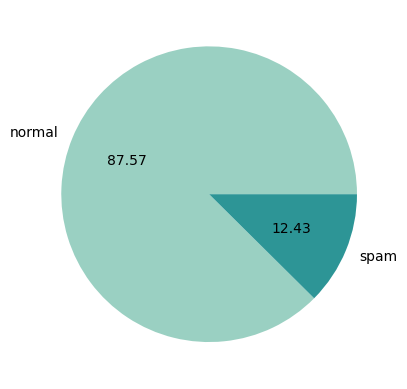

In [15]:
plt.pie(data['Category'].value_counts(), labels=['normal','spam'],autopct="%0.2f", colors=['#9AD0C2','#2D9596'])
plt.show()
#................................................................
# creating a pie chart

Preprocessing and Feature Extraction

In [18]:
X=data['Message']
Y=data['Category']
vectorizer=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
bag_of_words=vectorizer.fit_transform(X)
#................................................................
# converting a collection of message to a matrix of tokens for Naive Bayes Classifier

Split Data

In [19]:
X_train, X_test, Y_train, Y_test=train_test_split(bag_of_words, Y, train_size=0.80, random_state=0)

In [21]:
print(bag_of_words.shape)
print(X_train.shape)
print(X_test.shape)
# showing quantity of messages and unique words

(5157, 8440)
(4125, 8440)
(1032, 8440)


Naive Bayes Classifier Model

In [22]:
model=MultinomialNB().fit(X_train, Y_train)
#................................................................
# creating NB model

Evaluation

In [23]:
train_prediction=model.predict(X_train)
train_c_report=classification_report(Y_train,train_prediction)
train_c_matrix=confusion_matrix(Y_train,train_prediction)
train_accuracy=accuracy_score(Y_train,train_prediction)
#................................................................
# prediction on training data

In [24]:
print(train_prediction)
print(Y_train.values)
print('\n train classification_report: \n', train_c_report)
print('\n train confusion_matrix: \n', train_c_matrix)
print('\n train accuracy: ',train_accuracy)

[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]

 train classification_report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3619
           1       1.00      0.80      0.89       506

    accuracy                           0.98      4125
   macro avg       0.99      0.90      0.94      4125
weighted avg       0.98      0.98      0.97      4125


 train confusion_matrix: 
 [[3619    0]
 [ 100  406]]

 train accuracy:  0.9757575757575757


In [25]:
test_prediction=model.predict(X_test)
test_c_report=classification_report(Y_test,test_prediction)
test_c_matrix=confusion_matrix(Y_test,test_prediction)
test_accuracy=accuracy_score(Y_test,test_prediction)

#................................................................
# prediction on testing data

In [26]:
print(test_prediction)
print(Y_test.values)
print('\n test classification_report: \n', test_c_report)
print('\n test confusion_matrix: \n', test_c_matrix)
print('\n test accuracy: ',test_accuracy)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]

 test classification_report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       897
           1       1.00      0.71      0.83       135

    accuracy                           0.96      1032
   macro avg       0.98      0.86      0.90      1032
weighted avg       0.96      0.96      0.96      1032


 test confusion_matrix: 
 [[897   0]
 [ 39  96]]

 test accuracy:  0.9622093023255814


Prediction System

In [28]:
input_message=["hi, thank you for checking my work! it's useful for my future projects!"]
#input_message=["Congratulations - you're a winner!500 euros are yours"]
cooked_message=vectorizer.transform(input_message)

prediction=model.predict(cooked_message)
print(prediction)
if(prediction==1):
    print('Spam')
else:
    print('Normal')

[0]
Normal


Saving Model

In [29]:
pickle.dump(model,open("nb_model.pkl","wb"))

In [30]:
pickle.dump(vectorizer,open("extractor.pkl","wb"))